# Projet 3 : Concevez une application au service de la santé publique #

### Import du nécessaire ###

In [77]:
import numpy as np
import annexe as an
# import plotly.graph_objs as go
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)
FICHIER ='C:/Users/pierr/Documents/OC/projet3/en.openfoodfacts.org.products.csv'

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Observations


Observons quelques lignes de notre fichier

In [78]:
food_dataframe = pd.read_csv(FICHIER,sep='\t',low_memory=False)
display(food_dataframe.sample(10,random_state = 148625))

code                                                                                                             url          creator   created_t      created_datetime  last_modified_t last_modified_datetime                           product_name abbreviated_product_name generic_name quantity packaging packaging_tags packaging_text                    brands              brands_tags  \
1487069  8011510004527                             http://world-en.openfoodfacts.org/product/8011510004527/bianco-d-italia-sancrispino          kiliweb  1616587526  2021-03-24T12:05:26Z       1616587527   2021-03-24T12:05:27Z            Bianco d'italia Sancrispino                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
1266529  5410471910466  http://world-en.openfoodfacts.org/product/5410471910466/destrooper-biscuits-a-l-orange-14x67g-jules-destrooper          kiliweb  1537540389  2018-09-21T14:33:09Z       1582661071   2020-02-25T20:04:31Z  Destrooper Biscuits à L'orange 14X67G                      NaN          NaN      NaN       NaN            NaN            NaN          Jules Destrooper         jules-destrooper   
1149142  4311596692460                                    http://world-en.openfoodfacts.org/product/4311596692460/haferdrink-ungesusst          kiliweb  1621270652  2021-05-17T16:57:32Z       1621270657   2021-05-17T16:57:37Z                    Haferdrink ungesüßt                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
1434573  8000633025380                                                    http://world-en.openfoodfacts.org/product/8000633025380/ceci          kiliweb  1580672875  2020-02-02T19:47:55Z       1604059117   2020-10-30T11:58:37Z                                   Ceci                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
265419   0099482471477                               http://world-en.openfoodfacts.org/product/0099482471477/white-corn-tortilla-chips          kiliweb  1566607651  2019-08-24T00:47:31Z       1567015119   2019-08-28T17:58:39Z             White Corn, Tortilla Chips                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
17756    0011822661508                  http://world-en.openfoodfacts.org/product/0011822661508/unsalted-roasted-whole-cashews-big-win  usda-ndb-import  1489071293  2017-03-09T14:54:53Z       1587584747   2020-04-22T19:45:47Z         Unsalted Roasted Whole Cashews                      NaN          NaN      NaN       NaN            NaN            NaN                   Big Win                  big-win   
1546319  8410095007433                               http://world-en.openfoodfacts.org/product/8410095007433/borraja-al-natural-helios          kiliweb  1573764051  2019-11-14T20:40:51Z       1573770688   2019-11-14T22:31:28Z                     Borraja al natural                      NaN          NaN    400 g       NaN            NaN            NaN                    Helios                   helios   
48397    0024182002997                        http://world-en.openfoodfacts.org/product/0024182002997/eden-organic-refried-black-beans          kiliweb  1574269010  2019-11-20T16:56:50Z       1582826223   2020-02-27T17:57:03Z       Eden organic refried black beans                      NaN          NaN    16 oz       NaN            NaN            NaN                      Eden                     eden   
408743   0806253210407                                   http://world-en.openfoodfacts.org/product/0806253210407/organic-coconut-cream          kiliweb  1583117784  2020-03-02T02:56:24Z       1583117785   2020-03-02T02:56:25Z                  Organic coconut cream                      NaN          NaN      NaN       NaN            NaN            NaN             

Observons la liste de colonnes

In [79]:
for column in food_dataframe.columns:
    print(column)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
ecoscore_score_fr
ecoscore_grade_fr


### Elements pertinant pour le sport
50% glucides : bon glucide **carbohydrates** on un faible indice glycémique **glycemic-index_100g
** (pain complet, pates de blé dur, légumineuse)
20% lipides (après l'effort pk pas, avant non) acide gras omégas 3 **'alpha-linolenic','eicosapentaenoic-acid','docosahexaenoic-acid' omega-3-fat** et omégas 6 (renforce coeur et circulation) (poisson eau froide saumon maquereau, huile végétal
15% proteines source précieuse de protéines : oeuf, viande maigre, produit laitier et legumineuses
3h entre le gros repas et sport (noix , morceau de choco avant le sport), blanc d'oeuf 2h d'interval, boire du lait écrémé
boire important pour l'acheminement des nutriment (riche en sodium), eau gazeuse plus jus de fruit apres l'effort(1 pour 1)
avant entrainnement: glucides(pates, pain complet), oeuf brouillées,fruit yaourt,pauvre en fibre
pendant celui-ci:eau, boisson isotonique,barre de muesli
apres:jus de pomme petillant avec une pincée de sel,pas de graisse,glucides, protéines de ahute qualité,produit laitier


Activité de moins de 30 min : Il n’est pas nécessaire de boire pendant l’effort
Activité de 30 à 60 min : il faut boire de 125 à 250 ml de liquide à toutes les 15 à 20 minutes.
Activité de 60 min, il ne faut pas attendre d’avoir soif pour boire de l’eau
Activité durant 1h à 3h : il est préférable de choisir une boisson contenant du sucre
Activité de plus de 3 h : préférez une boisson contenant du sucre et un peu de sel (pour le sodium). À noter que le sodium et le potassium dans la boisson de réhydratation ne sont pas indispensables si l’activité physique dure moins de 3 h à 4 h, à moins que la sudation engendrée par l’activité physique ne soit excessive.

## Purification des données

Dataframe apres avoir garder que les colonnes pertinantes

In [88]:
dataframe_purify = an.open_csv_usefull_column()

In [90]:
copy_purify_for_test = dataframe_purify.copy()

Nombre de valeurs dans chaque colonnes

In [91]:
copy_purify_for_test.count()

code                                       1793993
url                                        1793993
product_name                               1716172
abbreviated_product_name                      5146
quantity                                    460907
packaging                                   286976
packaging_tags                              286946
packaging_text                                4299
brands                                      930022
brands_tags                                 929965
categories                                  857971
categories_tags                             857969
categories_en                               857969
emb_codes                                   114243
emb_codes_tags                              114212
first_packaging_code_geo                     70274
purchase_places                             152175
countries                                  1788439
countries_tags                             1788434
countries_en                   

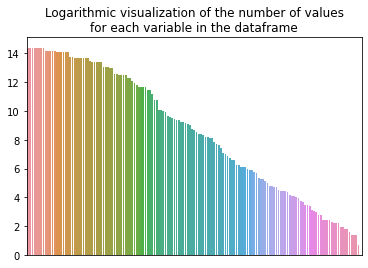

In [92]:
an.barplot_logarithm(copy_purify_for_test)

Il y a beaucoup de variables avec peu de valeurs, je ne trouve pas de seuil véritable. Je vais enlever les variables avec moins de 20 valeurs, elles risquerait de biaisé les résultats d'une futur application.

In [93]:
print("Dataframe de",copy_purify_for_test.shape[1],"colonnes en entré")
copy_purify_for_test2 = copy_purify_for_test.drop(copy_purify_for_test.loc[:,copy_purify_for_test.count() <= 20].columns,axis="columns")
print("Dataframe de",copy_purify_for_test2.shape[1],"colonnes en sortie")

Dataframe de 151 colonnes en entré
Dataframe de 130 colonnes en sortie


21 colonnes ont étaient enlevées.

Affichage des maximums pour chaque colonne du dataframe.

In [97]:
copy_purify_for_test2.max()

code                                                                                                   999999999999999
url                                        http://world-en.openfoodfacts.org/product/999999999999999/signal-toothpaste
serving_quantity                                                                             11111111111111100858368.0
nutriscore_score                                                                                                  40.0
ecoscore_score_fr                                                                                                125.0
energy-kj_100g                                                           6665558888888888950360610417759390841962496.0
energy-kcal_100g                                                                                       8693855001005.0
energy_100g                                                              6665558888888888950360610417759390841962496.0
energy-from-fat_100g                            

Affichage des minimums de chaque colonnes du dataframe.

In [98]:
copy_purify_for_test2.min()

code                                                                                                  0000000000017
url                                        http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers
serving_quantity                                                                                                0.0
nutriscore_score                                                                                              -15.0
ecoscore_score_fr                                                                                             -23.0
energy-kj_100g                                                                                                  0.0
energy-kcal_100g                                                                                                0.0
energy_100g                                                                                                     0.0
energy-from-fat_100g                                                    

Il y a énormement de valeur abhérentes dans les maximums et les minimums de chaque colonne comme par exemple 44400g de magnésium pour 100g de produit ou le -500g de protéines pour 100g de produit. Il faut donc purifier un peu le dataframe en enlevant les quantiles extrêmes des colonnes pour 100g de produit.

Je vais enlèver les quantiles extrêmes de chaque colonnes. Il faut faire attention à ne pas traiter toutes les colonnes de la même manière, les kcal pour 100g peuvent dépasser une valeur de 100, les ecoscores peuvent être négatif, le sodium pour 100g peut s'approcher de 100g. Je vais appliquer un traitement en fonction de la variable que je traite afin de ne pas éliminer trop de produit par variables.

In [100]:
dataframe_purify2 = an.remove_little_quantile3(copy_purify_for_test2)

forme du dataframe d'entré : 1793993  lignes et  130  colonnes.
column : nutrition-score-fr_100g ,  21  values erased
column : energy_100g ,  3518  values erased
column : energy-kj_100g ,  5  values erased
column : energy-kcal_100g ,  149  values erased
column : energy-from-fat_100g ,  5  values erased
column : carbon-footprint_100g ,  5  values erased
column : carbon-footprint-from-meat-or-fish_100g ,  30  values erased
column : -butyric-acid_100g ,  0  values erased
column : -palmitic-acid_100g ,  1  values erased
column : -arachidic-acid_100g ,  1  values erased
column : -behenic-acid_100g ,  1  values erased
column : omega-3-fat_100g ,  8  values erased
column : -alpha-linolenic-acid_100g ,  8  values erased
column : -eicosapentaenoic-acid_100g ,  2  values erased
column : -docosahexaenoic-acid_100g ,  3  values erased
column : omega-6-fat_100g ,  6  values erased
column : -linoleic-acid_100g ,  5  values erased
column : -arachidonic-acid_100g ,  2  values erased
column : omega-9-f

Visualisation de si l'algorythme a bien enlever les valeurs abhérentes des min et des max

In [101]:
print("Nouveaux maximum pour le dataframe")
display(dataframe_purify2.max())
print("\nNouveaux minimum pour le dataframe")
display(dataframe_purify2.min())

Nouveaux maximum pour le dataframe


code                                                                                                   999999999999999
url                                        http://world-en.openfoodfacts.org/product/999999999999999/signal-toothpaste
serving_quantity                                                                             11111111111111100858368.0
nutriscore_score                                                                                                  36.0
ecoscore_score_fr                                                                                                125.0
energy-kj_100g                                                                                                  3827.0
energy-kcal_100g                                                                                                1041.0
energy_100g                                                                                                     4351.0
energy-from-fat_100g                            


Nouveaux minimum pour le dataframe


code                                                                                                  0000000000017
url                                        http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers
serving_quantity                                                                                                0.0
nutriscore_score                                                                                              -15.0
ecoscore_score_fr                                                                                             -23.0
energy-kj_100g                                                                                                  0.0
energy-kcal_100g                                                                                                0.0
energy_100g                                                                                                     0.0
energy-from-fat_100g                                                    

Affichage des variable de type string avant et apres traitement pour enlever les majuscule et les tiret

In [102]:
STRING_VARIABLE_COLUMNS = ['pnns_groups_1','pnns_groups_2','nutriscore_grade','ecoscore_grade_fr']
for variable in STRING_VARIABLE_COLUMNS:
    display(dataframe_purify2[variable].value_counts())

unknown                    1091112
Sugary snacks               141238
Fish Meat Eggs               93052
Milk and dairy products      87705
Cereals and potatoes         79256
Fat and sauces               67812
Beverages                    64390
Composite foods              52775
Fruits and vegetables        46544
Salty snacks                 31991
fruits-and-vegetables         7346
sugary-snacks                 5360
cereals-and-potatoes            56
salty-snacks                     6
Name: pnns_groups_1, dtype: int64

unknown                             1091112
Sweets                                66721
Biscuits and cakes                    60594
Dressings and sauces                  47433
Cheese                                43563
One-dish meals                        41652
Cereals                               37889
Processed meat                        35683
Milk and yogurt                       30994
Meat                                  27794
Fish and seafood                      25064
Sweetened beverages                   22472
Vegetables                            22207
Bread                                 21099
Fats                                  20379
Fruits                                15986
Alcoholic beverages                   15829
Chocolate products                    13923
Salty and fatty products              13566
Appetizers                            10757
Unsweetened beverages                  9711
Artificially sweetened beverages       8946
Fruit juices                    

d    206848
c    141204
e    124471
a    106593
b     84623
Name: nutriscore_grade, dtype: int64

d    135365
b    133287
c     87645
e     57430
a     17865
Name: ecoscore_grade_fr, dtype: int64

In [103]:
dataframe_purify2_test = dataframe_purify2.copy()

In [104]:
an.text_regularisation(dataframe_purify2_test,STRING_VARIABLE_COLUMNS)
for variable in STRING_VARIABLE_COLUMNS:
    display(dataframe_purify2_test[variable].value_counts())

unknown                    1091112
sugary snacks               146598
fish meat eggs               93052
milk and dairy products      87705
cereals and potatoes         79312
fat and sauces               67812
beverages                    64390
fruits and vegetables        53890
composite foods              52775
salty snacks                 31997
Name: pnns_groups_1, dtype: int64

unknown                             1091112
sweets                                66721
biscuits and cakes                    60594
dressings and sauces                  47433
cheese                                43563
one dish meals                        41652
cereals                               37926
processed meat                        35683
milk and yogurt                       30994
vegetables                            29241
meat                                  27794
fish and seafood                      25064
sweetened beverages                   22472
bread                                 21099
fats                                  20379
fruits                                16298
alcoholic beverages                   15829
chocolate products                    13923
salty and fatty products              13566
appetizers                            10757
unsweetened beverages                  9711
artificially sweetened beverages       8946
fruit juices                    

d    206848
c    141204
e    124471
a    106593
b     84623
Name: nutriscore_grade, dtype: int64

d    135365
b    133287
c     87645
e     57430
a     17865
Name: ecoscore_grade_fr, dtype: int64

Les variables dans deux catégories différentes comme "salty-snacks" et "Salty snacks" sont maintenant sous "salty snacks".

## Correlation des variables

Matrice de correlation des variables numériques

In [105]:
dataframe_for_correlation = dataframe_purify2_test.copy()

In [106]:
correlation_dataframe = dataframe_for_correlation.corr(method='pearson')

In [107]:
correlation_dataframe.style.background_gradient(cmap='coolwarm')

In [108]:
an.plot_heat_map(correlation_dataframe)

Il parait y avoir beaucoup de correlation à 1. Regardons de plus près les résultats.  
Voici la liste des variables qui ont une corrélation de 1.

In [109]:
an.variables_correlation_over_parameter(correlation_dataframe,1)

Correlation de 1
nutriscore_score et nutrition-score-fr_100g
ecoscore_score_fr et -butyric-acid_100g
energy-kj_100g et energy_100g
-butyric-acid_100g et trans-fat_100g
-butyric-acid_100g et cholesterol_100g
-butyric-acid_100g et -lactose_100g
-butyric-acid_100g et vitamin-k_100g
-palmitic-acid_100g et omega-3-fat_100g
-palmitic-acid_100g et omega-6-fat_100g
-palmitic-acid_100g et vitamin-e_100g
-palmitic-acid_100g et vitamin-c_100g
-palmitic-acid_100g et potassium_100g
-palmitic-acid_100g et iron_100g
-arachidic-acid_100g et -lactose_100g
-arachidic-acid_100g et chromium_100g
-arachidic-acid_100g et taurine_100g
-behenic-acid_100g et polyols_100g
-behenic-acid_100g et fluoride_100g
omega-3-fat_100g et -sucrose_100g
omega-3-fat_100g et -fructose_100g
omega-3-fat_100g et -maltose_100g
omega-3-fat_100g et casein_100g
-eicosapentaenoic-acid_100g et cholesterol_100g
-eicosapentaenoic-acid_100g et vitamin-b1_100g
-eicosapentaenoic-acid_100g et vitamin-b2_100g
-eicosapentaenoic-acid_100g et v

Beaucoup trop de correlation sont à 1.

In [111]:
dataframe_for_correlation = dataframe_purify2_test.copy()

regarde les 5 premieres valeurs des variables ou la corrélation est de 1  
sinon affiche une ligne de "+" quand toutes les valeur d'une variable sont en vis a vis avec que des nan sur l'autre variables 

In [33]:
for num,column in enumerate(correlation_dataframe.columns):
        for row1 in correlation_dataframe.columns[num+1:]:
            if correlation_dataframe[column][row1] >= 0.95:
                print(((dataframe_for_correlation[column].notna()) & (dataframe_for_correlation[row1].notna())).sum())

3
2
2
2
3
2
663616
3
2
2
3
2
129865
2
2
4
2
4
1362365
3
4
2
2
3
3
5
5
2
2
3
2
4
3
2
2
2
2
4
2
3
3
3
2
2
2
3
3
3
2
2
2
3
2
3
4
3
2
2
2
4
2
2
3
4
2
3
2
2
2
2
2
2
3
2
2
2
7
2
2
2
4
4
3
2
2
2
3
2
2
2
3
43
17
2
10
3
2
6
3
3
5
3
2
6
2
2
2
2
2
3
3
7
9
2
2
2
2
2
2
2
2
3
2
4
55
3
15
2
2
2
2
4
2
2
3
4
3
2
2
2
2
2
2
3
3
2
5
2
2
2
2
2
2
2
3
2
2
2
2
4
2
3
3
2
2
2
2
2
5
3
2
2
3
3
9
9
4
2
2
2
3
2
2
2
2
5
2
13
2
5
4
4
3
2
2
2
4
3
4
2
3
2
5
2
2
1354346
2
2
2
2
2
2
2
582
3
2
30
2
2
2
2
2
2
2
2
2
16
12
2
130
3
2
2
2
2
8
2
2
2
2
2
5
3
5
2
2
2
6
4
2
2
214
2
8
2
2


In [15]:
def good_or_bad_correlation(correlation_matrix,dataframe_correlate,correlation_value):
    for num,column in enumerate(correlation_matrix.columns):
        for row1 in correlation_matrix.columns[num+1:]:
            comptnan = 0
            comptvalues  = 0
            #utiliser un masque pour accelerer le process -----------------------------------------------------------
            if correlation_matrix[column][row1] >= correlation_value:
                print("-------------------------------------------------------------------------------")
                if ((dataframe_for_correlation[column].notna()) & (dataframe_for_correlation[row1].notna())).sum() > 25:
                    display(dataframe_correlate[((dataframe_correlate[column].notna()) & (dataframe_correlate[row1].notna()))][[column,row1]].head(5))
                    display(dataframe_correlate[((dataframe_correlate[column].isna()) & (dataframe_correlate[row1].notna()))][[column,row1]].head(5))
                    display(dataframe_correlate[((dataframe_correlate[column].notna()) & (dataframe_correlate[row1].isna()))][[column,row1]].head(5))
                    
                else:
                    print("Fausse correlation de ",correlation_value," pour ",column," and ",row1)


#                 for row2 in range(dataframe_correlate.shape[0]):
#                     if not np.isnan(dataframe_correlate[column].iloc[row2]) and not np.isnan(dataframe_correlate[row1].iloc[row2]):
#                         display(column,dataframe_correlate[column].iloc[row2],row1,dataframe_correlate[row1].iloc[row2])
#                         print("-----------------------------")
#                         comptvalues += 1
#                     else:
#                         comptnan += 1
#                     if comptvalues == 5 :
#                         print("++++++++++++++++++++++++++++")
#                         break
#                     elif comptnan == dataframe_correlate.shape[0] : 
#                         print("no data matches between: ",column," and ",row1)

good_or_bad_correlation(correlation_dataframe,dataframe_for_correlation,1)

-------------------------------------------------------------------------------
Fausse correlation de  1  pour  serving_quantity  and  -dihomo-gamma-linolenic-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  nutriscore_score  and  -stearic-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  nutriscore_score  and  -lignoceric-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  nutriscore_score  and  chlorophyl_100g
-------------------------------------------------------------------------------


nutriscore_score  nutrition-score-fr_100g
4               18.0                     18.0
15               1.0                      1.0
24              14.0                     14.0
34              -2.0                     -2.0
38               1.0                      1.0

nutriscore_score  nutrition-score-fr_100g
518930                NaN                     13.0
602194                NaN                     22.0
616619                NaN                     22.0
1185133               NaN                     10.0
1772211               NaN                     22.0

Empty DataFrame
Columns: [nutriscore_score, nutrition-score-fr_100g]
Index: []

-------------------------------------------------------------------------------
Fausse correlation de  1  pour  nutriscore_score  and  nutrition-score-uk_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  ecoscore_score_fr  and  -butyric-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  ecoscore_score_fr  and  -capric-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  ecoscore_score_fr  and  glycemic-index_100g
-------------------------------------------------------------------------------


energy-kj_100g  energy_100g
4             936.0        936.0
170          1513.0       1513.0
286          2179.0       2179.0
289             5.0          5.0
330           450.0        450.0

energy-kj_100g  energy_100g
0              NaN       1569.0
3              NaN       3661.0
6              NaN         88.0
7              NaN        251.0
13             NaN        264.0

Empty DataFrame
Columns: [energy-kj_100g, energy_100g]
Index: []

-------------------------------------------------------------------------------
Fausse correlation de  1  pour  energy-kj_100g  and  -caprylic-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  fat_100g  and  -dihomo-gamma-linolenic-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  saturated-fat_100g  and  -caprylic-acid_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -butyric-acid_100g  and  trans-fat_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -butyric-acid_100g  and  cholesterol_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -butyric-acid_100g  and  -lactose_100g
------------------------------------------------------------------------

relation glucide sucre

In [16]:
dataframe_purify_sample = dataframe_purify.sample(500)

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_theme(style="dark")
sns.scatterplot(x=dataframe_purify_sample['carbohydrates_100g'], y=dataframe_purify_sample['sugars_100g'], s=5, color=".15")
# sns.histplot(x=dataframe_purify_sample['carbohydrates_100g'], y=dataframe_purify_sample['sugars_100g'], bins=50, pthresh=.1, cmap="mako")
# sns.kdeplot(x=dataframe_purify_sample['carbohydrates_100g'], y=dataframe_purify_sample['sugars_100g'], levels=5, color="w", linewidths=1)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='sugars_100g'>

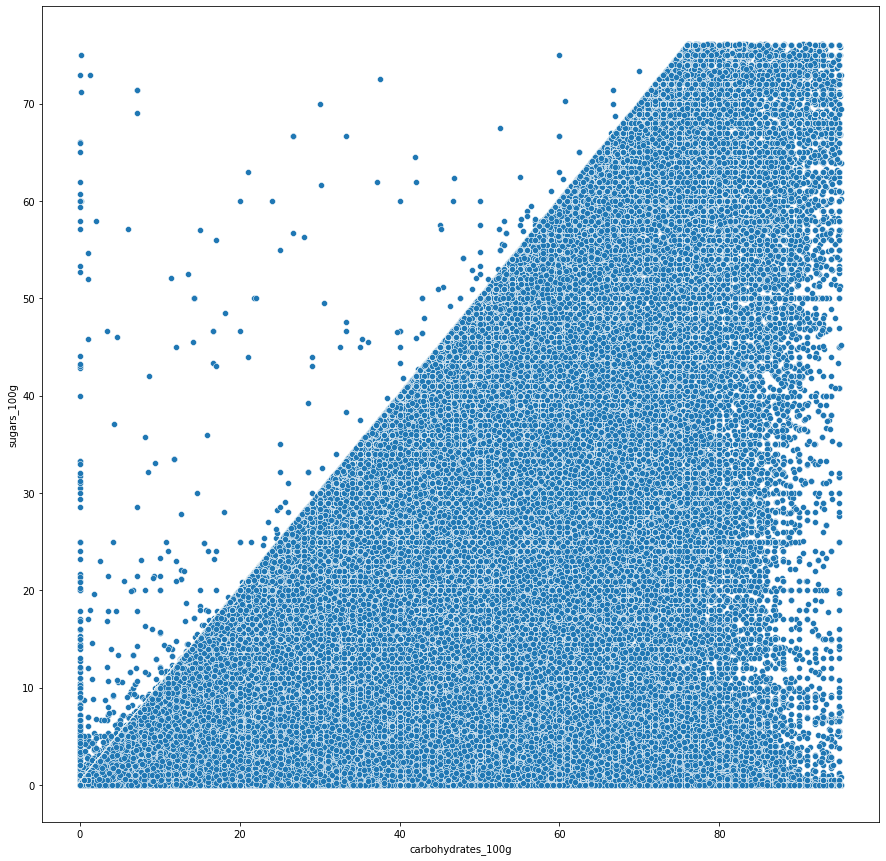

In [30]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="carbohydrates_100g", y="sugars_100g")

relation glucide fibre

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='fiber_100g'>

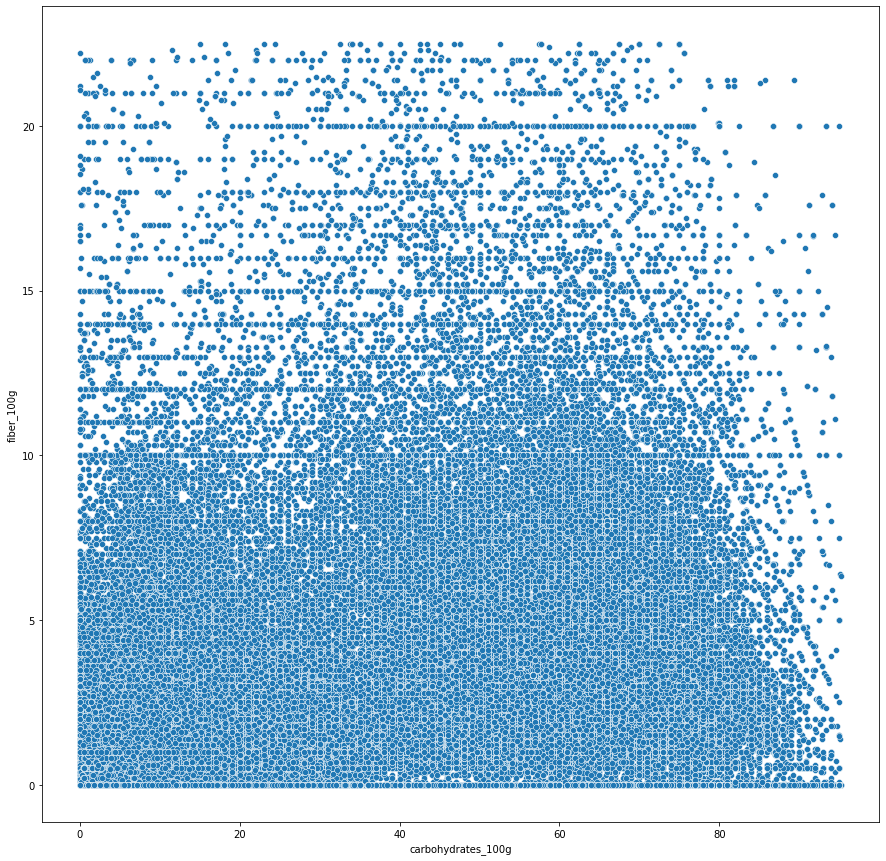

In [28]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="carbohydrates_100g", y="fiber_100g")

relation glucide amidon

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='starch_100g'>

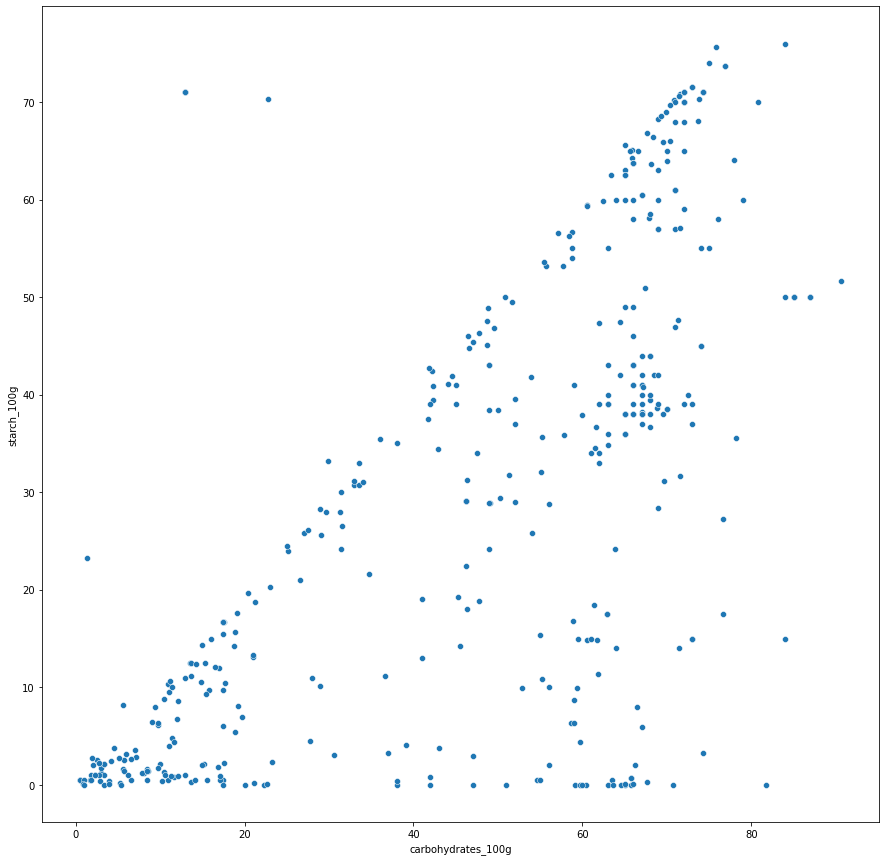

In [29]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="carbohydrates_100g", y="starch_100g")

relation amidon fibre

<AxesSubplot:xlabel='starch_100g', ylabel='fiber_100g'>

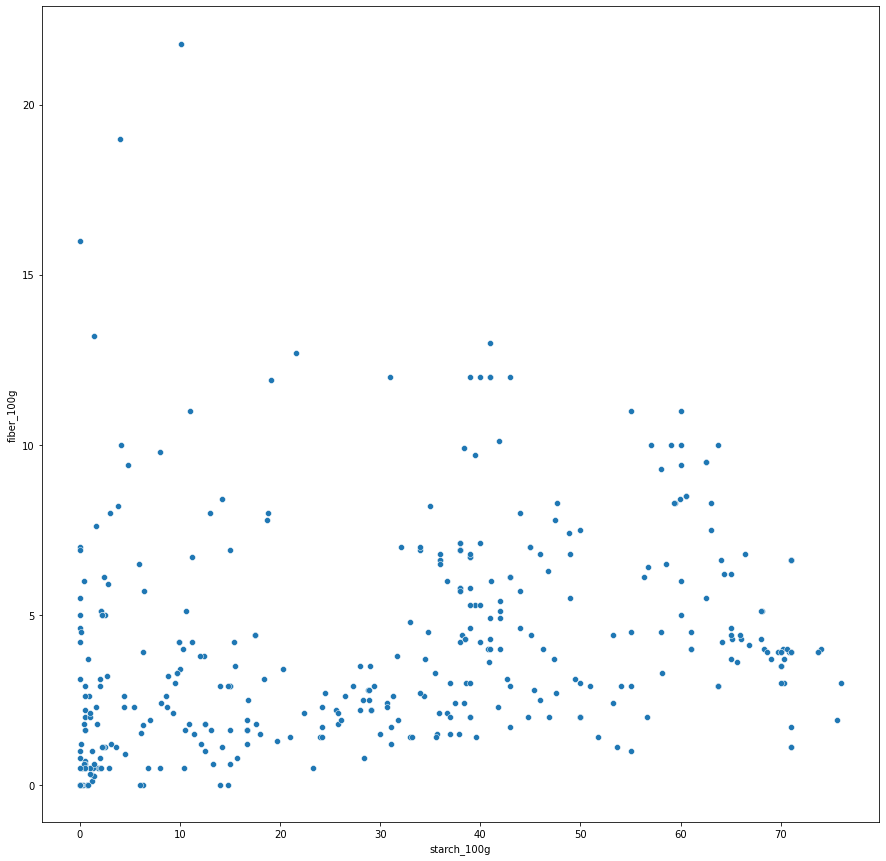

In [31]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="starch_100g", y="fiber_100g")

In [22]:
dataframe_purify.columns.tolist()

['code',
 'url',
 'product_name',
 'abbreviated_product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_quantity',
 'nutriscore_score',
 'nutriscore_grade',
 'pnns_groups_1',
 'pnns_groups_2',
 'ecoscore_score_fr',
 'ecoscore_grade_fr',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-ac

In [52]:
dataframe_purify[dataframe_purify["sodium_100g"] > 6]


code                                                                                  url                 product_name abbreviated_product_name quantity  packaging packaging_tags packaging_text     brands brands_tags                             categories                           categories_tags                    categories_en emb_codes emb_codes_tags first_packaging_code_geo purchase_places stores      countries    countries_tags   countries_en  \
64       0000000005081                 http://world-en.openfoodfacts.org/product/0000000005081/salade-verte                 Salade verte                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN         France         en:france         France   
139      0000000018371   http://world-en.openfoodfacts.org/product/0000000018371/real-salt-granular-redmond           Real Salt Granular                      NaN      NaN        NaN            NaN            NaN    Redmond     redmond                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
197      0000000033084           http://world-en.openfoodfacts.org/product/0000000033084/fine-sea-salt-unfi                Fine Sea Salt                      NaN      NaN        NaN            NaN            NaN       Unfi        unfi                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
1346     0000946002915             http://world-en.openfoodfacts.org/product/0000946002915/chicken-boullion             Chicken boullion                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                           Meals, Soups                         en:meals,en:soups                      Meals,Soups       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
1348     0000946004964                 http://world-en.openfoodfacts.org/product/0000946004964/iodized-salt                 Iodized salt                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                  Groceries, Condiments                en:groceries,en:condiments             Groceries,Condiments       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
...                ...                                                                                  ...                          ...                      ...      ...        ...            ...            ...        ...         ...                                    ...                                       ...                              ...       ...            ...                      ...             ...    ...            ...               ...            ...   
1759090  9788892135802              http://world-en.openfoodfacts.org/product/9788892135802/diritto-privato              DIRITTO PRIVATO                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN          en:it          en:italy          Italy   
1759128  9789912408135                  http://world-en.openfoodfacts.org/product/9789912408135/jus-de-gris                  Jus de gris                      NaN      NaN        NaN            NaN            NaN        NaN         NaN

In [21]:
dataframe_purify[dataframe_purify["selenium_100g"] == 38.8]
dataframe.iloc[1025584]

code                                                                                                                                                                                                                                                                                                                                              3770013130113
url                                                                                                                                                                                                                                              http://world-en.openfoodfacts.org/product/3770013130113/kefir-de-fruits-gingembre-bio-le-labo-dumoulin-lld-cie
product_name                                                                                                                                                                                                                                                                                            

In [26]:
dataframe["carbohydrates_100g"].sort_values().head(100)

1025584   -1.0
625136     0.0
1424501    0.0
1424502    0.0
1144557    0.0
1424510    0.0
336392     0.0
336390     0.0
336388     0.0
1424511    0.0
336385     0.0
1376432    0.0
680279     0.0
336384     0.0
336383     0.0
1007021    0.0
336382     0.0
336373     0.0
336371     0.0
469951     0.0
1424544    0.0
100039     0.0
1424549    0.0
1424550    0.0
1006941    0.0
336349     0.0
336347     0.0
336341     0.0
469897     0.0
1424499    0.0
1424498    0.0
1424497    0.0
100103     0.0
336462     0.0
336459     0.0
336457     0.0
1564861    0.0
336456     0.0
1659933    0.0
336454     0.0
336451     0.0
336450     0.0
336449     0.0
1659926    0.0
336440     0.0
100087     0.0
336439     0.0
336430     0.0
1007124    0.0
1007120    0.0
469873     0.0
1007117    0.0
1424492    0.0
1424493    0.0
336394     0.0
1424494    0.0
1424495    0.0
100073     0.0
1424496    0.0
336339     0.0
336338     0.0
336334     0.0
336332     0.0
470041     0.0
1006883    0.0
336330     0.0
336328    

determiner les quantile avec scipy pour eliminer les valeur aberrantes
faire un pandas.dataframe.corr pour essayer de trouver une corelation entre deux variable (facteur 1 , variable egal, donc redondant et à sortir)
nettoyer pnns a cause de la casse (librairie nltk)
comparer les sucre et les glucide pour avoir l'indice glycemique  
--------------------------------  
essayer de créer un chiffre pour le quintile de façon automatique en regardant le max de la valeur encore dans le dataframe et regardant le facteur entre cette valeur et celle sorti juste au dessus
présenter ça sous forme d'un graphe en montrant les valeurs exclus


In [22]:
dataframe2 = dataframe.drop(dataframe[dataframe["carbohydrates_100g"] > 100].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2["carbohydrates_100g"] < 0].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2["sodium_100g"] > 100].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2["sodium_100g"] < 0].index)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
dataframe2 = dataframe2.sort_values(by=['carbohydrates_100g'],ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x='carbohydrates_100g', y=dataframe2.index, data=dataframe2,label='carbohydrates_100g', color="b")
ax.legend(ncol=1, loc="lower right", frameon=True,fontsize='large')
ax.xaxis.tick_top()    
# if title == "Study years in selected countries":
#     for i,value in enumerate(dataframe2[sort_by]):
#         ax.text(value+3/xmin, i + 0.2,str(value),fontsize=15)
# else:
#     for i,value in enumerate(dataframe2[sort_by]):
#         ax.text(value+3/xmin, i + 0.2,str(int(value)),fontsize=15)    
plt.xlabel( xlabel="title",fontsize=18)
ax.set(xlim=(0, 100), ylabel="", xlabel='title')
sns.despine(left=True, bottom=True)

In [ ]:

# display(dataframe2)#["carbohydrates_100g"].sort_values(ascending=False).head(1))
sns.set_theme(style="ticks")
# diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)

sns.histplot(
    dataframe2,
    x="carbohydrates_100g",#hue="sodium_100g",
    #multiple="stack",
    palette="light:m_r",
    edgecolor="0.3",
    linewidth=0.5,
#     log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0, 20, 40, 60, 80,100])

In [ ]:
sns.set_theme(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="omega-3-fat_100g", y="omega-9-fat_100g",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=dataframe2, ax=ax)

Voici quelques variables pertinentes pour un application orienté sport

In [ ]:
trace_element_variables = ['sodium_100g','zinc_100g','copper_100g','potassium_100g','selenium_100g','manganese_100g','chromium_100g','iodine_100g']
acid_variables = ['omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g']
vitamin_variables = ['vitamin-b1_100g','vitamin-b2_100g','vitamin-b6_100g']
sugar_variables = ['carbohydrates_100g','glycemic-index_100g','sugars_100g','-sucrose_100g','-glucose_100g','-fructose_100g','-lactose_100g','-maltose_100g','-maltodextrins_100g']
string_variables = ['pnns_groups_1','pnns_groups_2','nutriscore_score','nutriscore_grade','ecoscore_score_fr','ecoscore_grade_fr']